In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## K-means clustering algorithm
 
* Choose k initial centroids in the space of the input dataset 
* Repeat:
    * E-step: put each pattern from the input dataset in a cluster defined by its nearest centroid. 
    * M-step: move each centroid so to minimize its distance from all the patterns in that cluster.

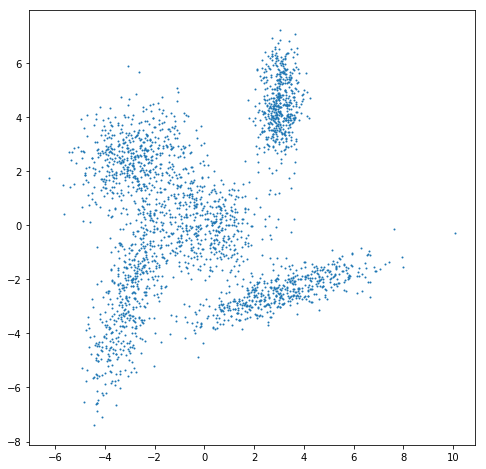

In [2]:
dataset=np.loadtxt("dataset.txt")
plt.figure(figsize=(8,8))
plt.scatter(*dataset.T, s=1)

In [3]:
n_centroids = 5
n_dataset = len(dataset)
centroids = np.random.randn(n_centroids, 2)*5
labels = np.random.randint(n_centroids, n_dataset)

In [4]:
class kmeans:

    def __init__(self, dataset):
        
        self.dataset = dataset
        self.n_centroids = 5
        self.n_dataset = len(self.dataset)
        self.centroids = np.random.randn(self.n_centroids, 2)
        self.labels = np.random.randint(self.n_centroids, self.n_dataset)  
    
    def estep(self):
        dataset_rep = np.array([self.dataset for j in range(self.n_centroids)]) 
        centroids_rep = np.array([self.centroids for j in range(self.n_dataset)]) 
        centroids_rep = np.transpose(centroids_rep,(1,0,2))
        norms = np.linalg.norm(dataset_rep - centroids_rep, axis=2)
        self.labels = np.argmin(norms, 0)    

    def mstep(self):
        self.centroids = np.vstack([np.mean(self.dataset[self.labels==x], 0) for x in range(self.n_centroids) ])
    
    def plot(self, title):
        plt.figure(figsize=(3,3))
        plt.suptitle(title)
        plt.scatter(*self.dataset.T, s=0.2, alpha=.3, c=plt.cm.hsv(self.labels/5.0))   
        plt.scatter(*self.centroids.T, s=100, edgecolors="black", c=plt.cm.hsv(np.arange(5)/5.0))   
        
km = kmeans(dataset)

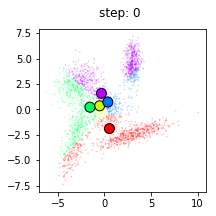

In [5]:
km.estep()
km.plot("step: %d"%0)

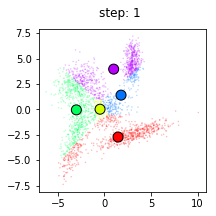

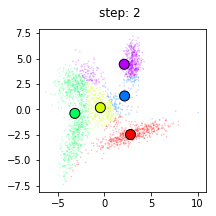

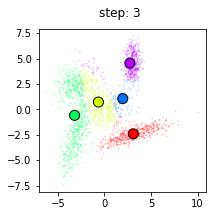

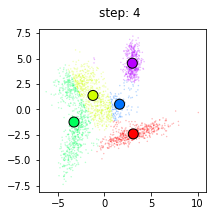

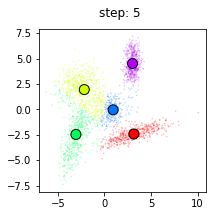

In [6]:
for x in range(5):
    km.estep()
    km.mstep()
    km.plot("step: %d"%(x+1))